In [1]:
from scikit_stan import GLM

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

c:\Users\alizm\anaconda3\envs\intern\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mpl.rc('axes.spines', top=True, bottom=True, left=True, right=True)
#mpl.rc('axes', facecolor='white')
mpl.rc("xtick", bottom=True, labelbottom=True)
mpl.rc("ytick", left=True, labelleft=True)
mpl.style.use('ggplot')


# center images
from IPython.core.display import HTML
HTML("""
<style>
.jp-RenderedImage, .output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [10]:
from sklearn.datasets import make_regression

X, y, true_weights = make_regression(
    n_samples=100,
    n_features=100,
    n_informative=10,
    noise=8,
    coef=True,
    random_state=42,
)

In [11]:
from sklearn.linear_model import ARDRegression, LinearRegression, BayesianRidge

olr = LinearRegression().fit(X, y)
brr = BayesianRidge(compute_score=True, n_iter=30).fit(X, y)
ard = ARDRegression(compute_score=True, n_iter=30).fit(X, y)
glm = GLM().fit(X, y)

c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:425: UserWarning: 
                    Link function not specified. Using default link function 'identity'
                    for family 'gaussian'.
                
  """
c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:520: UserWarning: Prior on intercept not specified. Using default prior.
                alpha ~ normal(mu(y), 2.5 * sd(y)) if Gaussian family else normal(0, 2.5)
  alpha ~ normal(mu(y), 2.5 * sd(y)) if Gaussian family else normal(0, 2.5)"""
c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:566: UserWarning: Prior on auxiliary parameter not specified. Using default unscaled prior
                        sigma ~ exponential(1)
                    
  """
21:59:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉       


21:59:21 - cmdstanpy - INFO - CmdStan done processing.


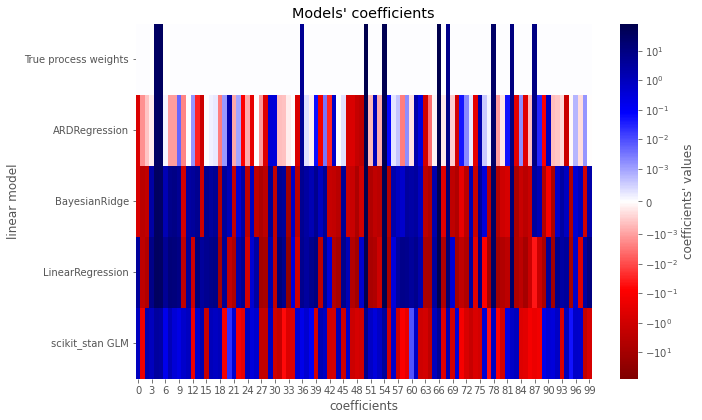

In [12]:
import seaborn as sns
from matplotlib.colors import SymLogNorm

df = pd.DataFrame(
    {
        "True process weights": true_weights,
        "ARDRegression": ard.coef_,
        "BayesianRidge": brr.coef_,
        "LinearRegression": olr.coef_,
        "scikit_stan GLM": glm.beta_
    }
)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    df.T,
    norm=SymLogNorm(linthresh=10e-4, vmin=-80, vmax=80),
    cbar_kws={"label": "coefficients' values"},
    cmap="seismic_r",
)
plt.ylabel("linear model")
plt.xlabel("coefficients")
plt.tight_layout(rect=(0, 0, 1, 0.95))
_ = plt.title("Models' coefficients")

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

rng = np.random.RandomState(0)
n_samples = 110

# sort the data to make plotting easier later
X = np.sort(-10 * rng.rand(n_samples) + 10)
noise = rng.normal(0, 1, n_samples) * 1.35
y = np.sqrt(X) * np.sin(X) + noise
full_data = pd.DataFrame({"input_feature": X, "target": y})
X = X.reshape((-1, 1))

# extrapolation
X_plot = np.linspace(10, 10.4, 10)
y_plot = np.sqrt(X_plot) * np.sin(X_plot)
X_plot = np.concatenate((X, X_plot.reshape((-1, 1))))
y_plot = np.concatenate((y - noise, y_plot))

In [14]:
ard_poly = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    ARDRegression(),
).fit(X, y)
y_ard, y_ard_std = ard_poly.predict(X_plot, return_std=True)

glm_poly = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    GLM()
).fit(X, y)

y_glm, y_glm_std = glm_poly.predict(X_plot, return_std=True)

c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:425: UserWarning: 
                    Link function not specified. Using default link function 'identity'
                    for family 'gaussian'.
                
  """
c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:520: UserWarning: Prior on intercept not specified. Using default prior.
                alpha ~ normal(mu(y), 2.5 * sd(y)) if Gaussian family else normal(0, 2.5)
  alpha ~ normal(mu(y), 2.5 * sd(y)) if Gaussian family else normal(0, 2.5)"""
c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:566: UserWarning: Prior on auxiliary parameter not specified. Using default unscaled prior
                        sigma ~ exponential(1)
                    
  """
21:59:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉       


21:59:30 - cmdstanpy - INFO - CmdStan done processing.


21:59:31 - cmdstanpy - INFO - Chain [1] start processing
21:59:31 - cmdstanpy - INFO - Chain [2] start processing
21:59:31 - cmdstanpy - INFO - Chain [3] start processing
21:59:31 - cmdstanpy - INFO - Chain [4] start processing
21:59:32 - cmdstanpy - INFO - Chain [3] done processing
21:59:32 - cmdstanpy - INFO - Chain [2] done processing
21:59:32 - cmdstanpy - INFO - Chain [1] done processing
21:59:32 - cmdstanpy - INFO - Chain [4] done processing


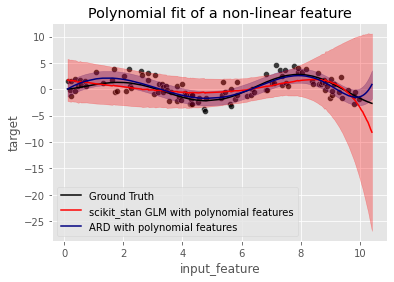

In [16]:
ax = sns.scatterplot(
    data=full_data, x="input_feature", y="target", color="black", alpha=0.75
)
ax.plot(X_plot, y_plot, color="black", label="Ground Truth")
ax.plot(X_plot, y_glm, color="red", label="scikit_stan GLM with polynomial features")
ax.plot(X_plot, y_ard, color="navy", label="ARD with polynomial features")
ax.fill_between(
    X_plot.ravel(),
    y_ard - y_ard_std,
    y_ard + y_ard_std,
    color="navy",
    alpha=0.3,
)
ax.fill_between(
    X_plot.ravel(),
    y_glm - y_glm_std,
    y_glm + y_glm_std,
    color="red",
    alpha=0.3,
)
ax.legend()
_ = ax.set_title("Polynomial fit of a non-linear feature")